<a href="https://colab.research.google.com/github/narsym/deep-learning-with-pytorch/blob/master/pytorch_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [

	    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',

	    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',

	    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',

	    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',

	    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',

	    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',

	    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',

	    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',

	    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',

	    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',

	    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',

	    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'

	]

In [10]:
def get_prediction(img_path, threshold):
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
  pred_boxes = pred_boxes[:pred_t + 1]
  pred_class = pred_class[:pred_t + 1]
  return pred_boxes, pred_class

In [5]:
def object_detection_api(img_path, threshold = 0.5, rect_th = 3, text_size = 3, text_th = 3):
  
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1], color = (0, 255, 0), thickness = rect_th)
    cv2.putText(img, pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness = text_th)

  plt.figure(figsize = (20, 30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [6]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg -O people.jpg

--2020-07-27 04:59:31--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]   1.83M  2.18MB/s    in 0.8s    

2020-07-27 04:59:32 (2.18 MB/s) - ‘people.jpg’ saved [1923610/1923610]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


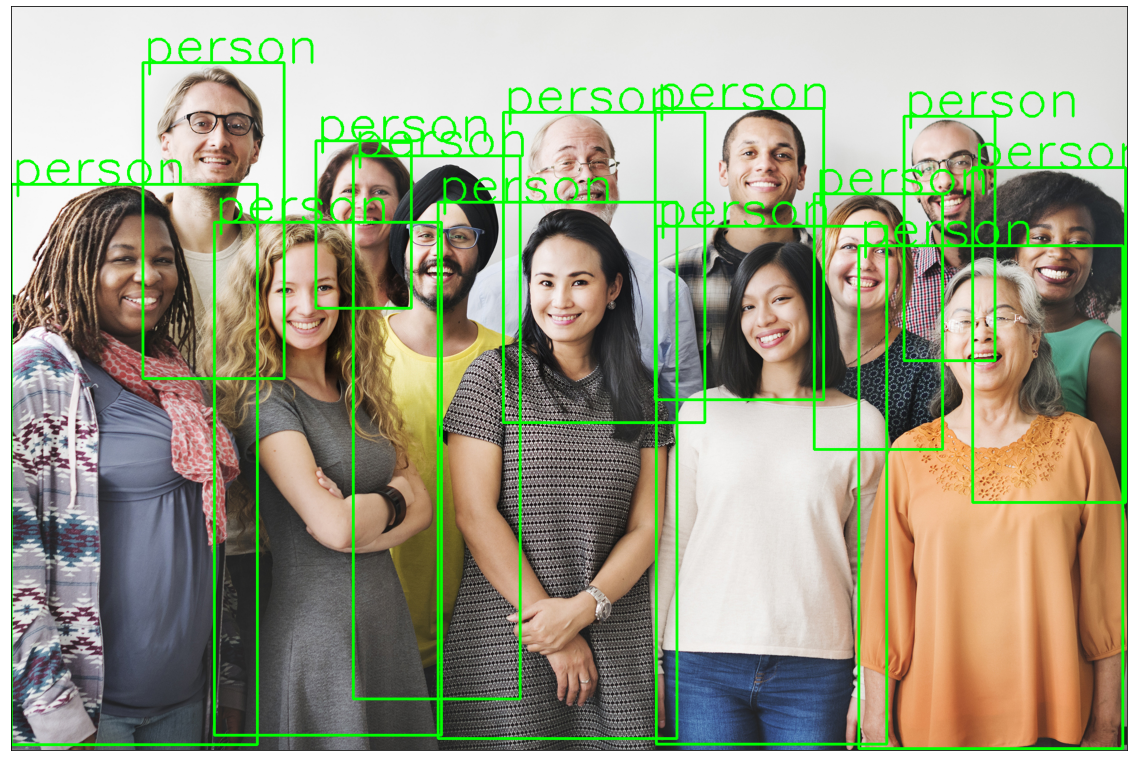

In [14]:
from PIL import Image
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt

object_detection_api('./people.jpg', threshold = 0.8)

--2020-07-27 05:03:51--  https://images.unsplash.com/photo-1458169495136-854e4c39548a
Resolving images.unsplash.com (images.unsplash.com)... 151.101.78.208, 2a04:4e42:12::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1168686 (1.1M) [image/jpeg]
Saving to: ‘girl_cars.jpg’

girl_cars.jpg       100%[===================>]   1.11M  --.-KB/s    in 0.1s    

2020-07-27 05:03:52 (8.14 MB/s) - ‘girl_cars.jpg’ saved [1168686/1168686]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


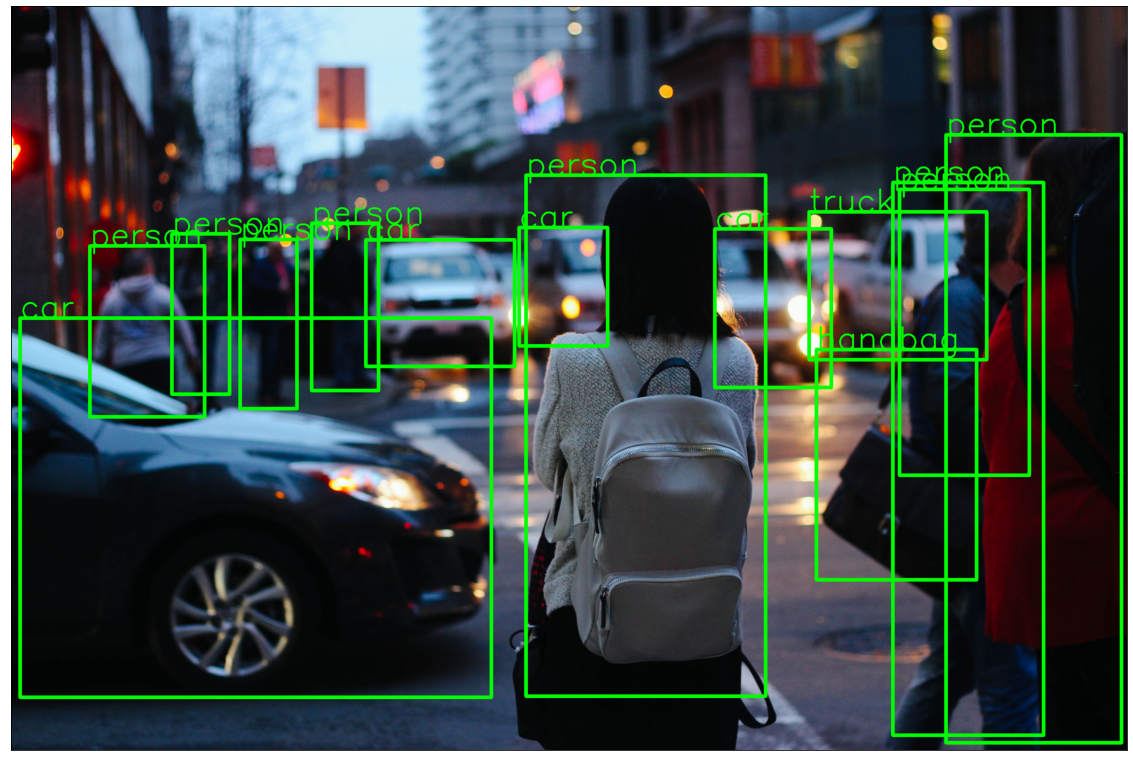

In [15]:
!wget https://images.unsplash.com/photo-1458169495136-854e4c39548a -O girl_cars.jpg

object_detection_api('./girl_cars.jpg', rect_th=15, text_th=7, text_size=5, threshold=0.8)  

--2020-07-27 05:04:35--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2178423 (2.1M) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]   2.08M  9.41MB/s    in 0.2s    

2020-07-27 05:04:36 (9.41 MB/s) - ‘car.jpg’ saved [2178423/2178423]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


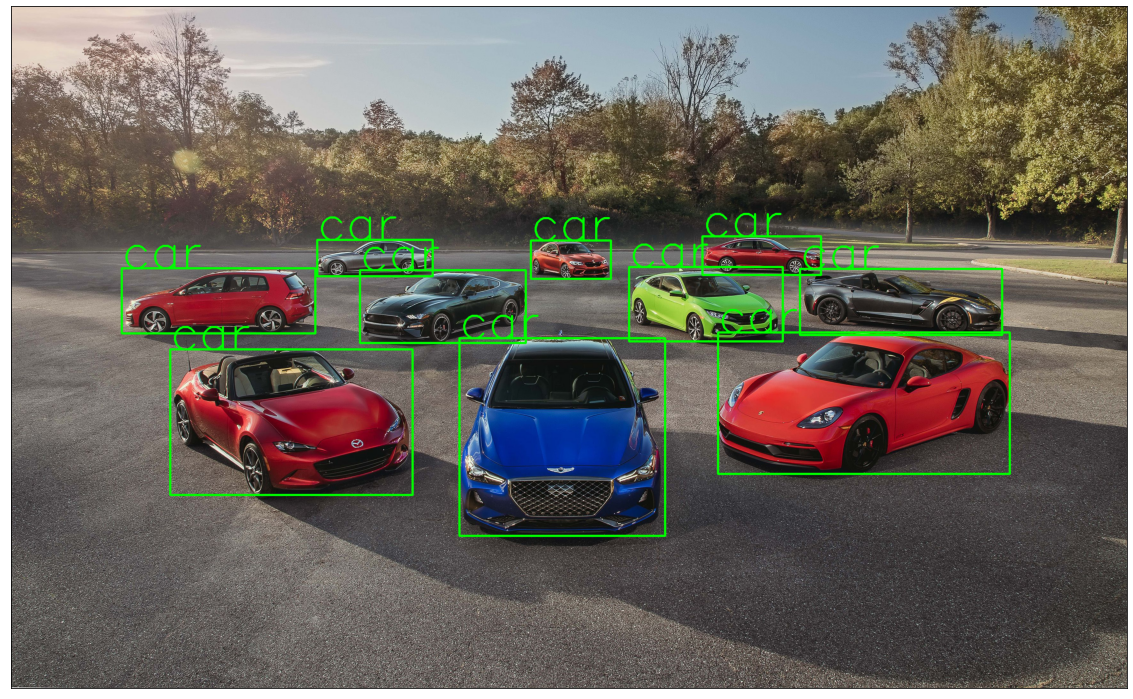

In [16]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O car.jpg

object_detection_api('./car.jpg', rect_th=6, text_th=5, text_size=5)